# Теория. Задание 1 

Буду искать белки, с похожей аминокислотной последовательностью на уровне первичной структуры . Затем можно запустить какое-нибудь эволюционное дерево, отжиг и тд. Это может помочь предсказать структуру белка.

Еще поиграюсь в FoldIt, вдруг замечу какую-то интересную особенность белка.

Еще могу порезать белок на маленькие куски и посмотреть, какую структуру каждый из этих кусочков обычно имеет в других белках. Таким образом, я увеличиваю алфавит с 20 аминокислот до какого-то большого числа кусков, но зато существенно сокращаю длину, так что теперь предсказывать мне будет гораздо проще. 

# Задание 1

In [34]:
import numpy as np
from termcolor import colored

In [35]:
def needleman_wunsch_algorithm(s, t, verbose=False, end=' \t'):
    n = len(s)
    m = len(t)
    defult_value = np.empty((), dtype=object)
    defult_value[()] = (0, 0)
    anc = np.full(shape=(n + 1, m + 1), fill_value=defult_value, dtype=object)
    dp = np.full(shape=(n + 1, m + 1), fill_value=np.iinfo(np.int32).max)
    
    for i in range(n + 1):
        dp[i][0] = i
        anc[i][0] = (i - 1, 0)
    for i in range(m + 1):
        dp[0][i] = i
        anc[0][i] = (0, i - 1)
        
    def update(x, y, prev_x, prev_y, penalty):
        if dp[x][y] > dp[prev_x][prev_y] + penalty:
            dp[x][y] = dp[prev_x][prev_y] + penalty
            anc[x][y] = (prev_x, prev_y)
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            update(i, j, i - 1, j, 1)
            update(i, j, i, j - 1, 1)
            penalty = -1
            if s[i - 1] != t[j - 1]:
                penalty = 1
            update(i, j, i - 1, j - 1, penalty)

    x, y = n, m
    result = []
    on_path = set()
    while x != 0 or y != 0:
        on_path.add((x, y))
        prev_x, prev_y = anc[x][y]
        if prev_x + 1 == x and prev_y + 1 == y:
            if s[prev_x] == t[prev_y]:
                result.append((s[prev_x], t[prev_y], 'black'))
            else:
                result.append((s[prev_x], t[prev_y], 'red'))
        if prev_x + 1 == x and prev_y == y:
            result.append((s[prev_x], '-', 'red'))
        if prev_x == x and prev_y + 1 == y:
            result.append(('-', t[prev_y], 'red'))
        x, y = prev_x, prev_y
    on_path.add((x, y))
        
    def print_with_color(c, color):
        if color != 'black':
            print(colored(c, color), end='')
        else:
            print(c, end='')
    
    cnt = 0
    for c, _, color in reversed(result):
        cnt += color == 'red'
        print_with_color(c, color)
#     assert cnt == dp[len(s)][len(t)]
    print()
    
    for _, c, color in reversed(result):
        print_with_color(c, color)
    print()
    
    if verbose:
        for i in range(n + 1):
            if i != 0:
                print(colored(s[i - 1], 'magenta', attrs=['bold']), end=end)
            else:
                print(' ', end=end)
                print(' ', end=end)
                for j in range(m):
                    print(colored(t[j - 1], 'magenta', attrs=['bold']), end=end)
                print()
                print(' ', end=end)
            for j in range(m + 1):
                if (i, j) in on_path:
                    print(colored(dp[i][j], 'red', attrs=['bold']), end=end)
                else:
                    print(dp[i][j], end=end)
            print()
    
    return dp[len(s)][len(t)]

In [36]:
needleman_wunsch_algorithm('CAGCACTTGGATTCTCGG', 'CAGCGTGG', verbose=True, end='\t')

CAGCACTTGGATTCTCGG
CAGC----G--T----GG
 	 	G	C	A	G	C	G	T	G	
 	0	1	2	3	4	5	6	7	8	
C	1	-1	0	1	2	3	4	5	6	
A	2	0	-2	-1	0	1	2	3	4	
G	3	1	-1	-3	-2	-1	0	1	2	
C	4	2	0	-2	-4	-3	-2	-1	0	
A	5	3	1	-1	-3	-3	-2	-1	0	
C	6	4	2	0	-2	-2	-2	-1	0	
T	7	5	3	1	-1	-1	-3	-2	-1	
T	8	6	4	2	0	0	-2	-2	-1	
G	9	7	5	3	1	-1	-1	-3	-3	
G	10	8	6	4	2	0	0	-2	-4	
A	11	9	7	5	3	1	1	-1	-3	
T	12	10	8	6	4	2	0	0	-2	
T	13	11	9	7	5	3	1	1	-1	
C	14	12	10	8	6	4	2	2	0	
T	15	13	11	9	7	5	3	3	1	
C	16	14	12	10	8	6	4	4	2	
G	17	15	13	11	9	7	5	3	3	
G	18	16	14	12	10	8	6	4	2	


2

# Задание 2

In [37]:
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_dna
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

In [38]:
records = [
    'ACTCATGG',
    'AAGCACGG',
    'AAGCAAGG',
    'AATCAGGG',
    'AAGTATGG',
    'AAGCAGGG',
    'TCTCACGG',
    'CCTCGTGG',
    'CCGTATGG',
    'ACTCGTCG'
]

records = [
    SeqRecord(Seq(record, generic_dna), id=str(i))
    for i, record in enumerate(records)
]

align = MultipleSeqAlignment(records, annotations={"tool": "demo"})
align.sort()
print(align)

DNAAlphabet() alignment with 10 rows and 8 columns
ACTCATGG 0
AAGCACGG 1
AAGCAAGG 2
AATCAGGG 3
AAGTATGG 4
AAGCAGGG 5
TCTCACGG 6
CCTCGTGG 7
CCGTATGG 8
ACTCGTCG 9


# Задание 3

In [2]:
from Bio import SeqIO

SeqIO.convert('cl.fq', 'fastq', 'cl.fasta', 'fasta')

ImportError: No module named Bio

# Задание 4

In [40]:
from Bio import Seq

dna = Seq.Seq('GGATCGTAGCCTA')
s = '5\'-' + str(dna.reverse_complement()) + '-3\''
print(s)

5'-TAGGCTACGATCC-3'


# Задание 5

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_graphic(seq1, seq2, k=1):
    matrix = [
        [
            np.sum(np.array(list(seq1[i:i+k])) == np.array(list(seq2[j:j+k])))
            for j in range(len(seq2) - k + 1)
        ] for i in range(len(seq1) - k + 1)
    ]
    matrix = np.flip(matrix, 0)
    plt.imshow(matrix)
    plt.colorbar()
    plt.xticks(numpy.arange(len(seq2)), seq2)
    plt.yticks(numpy.arange(len(seq1)), seq1[::-1])
    plt.plot()

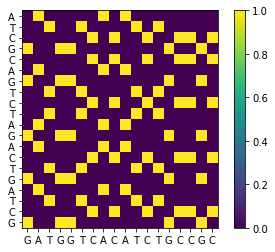

In [147]:
draw_graphic('GCTAGTCAGATCTGACGCTA', 'GATGGTCACATCTGCCGC', 1)

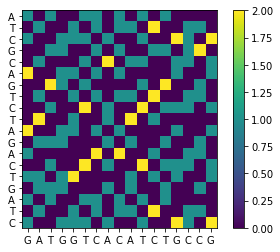

In [149]:
draw_graphic('GCTAGTCAGATCTGACGCTA', 'GATGGTCACATCTGCCGC', 2)

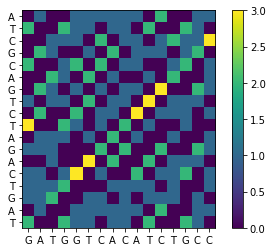

In [150]:
draw_graphic('GCTAGTCAGATCTGACGCTA', 'GATGGTCACATCTGCCGC', 3)

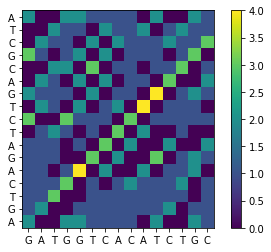

In [151]:
draw_graphic('GCTAGTCAGATCTGACGCTA', 'GATGGTCACATCTGCCGC', 4)

Диагональ графиков при разной ширине окна имеет много желтых клеток, а значит имеется область схожести.

# Задание 6

В первом выравнивании гэпов больше и они короткие, во втором -- наоборот. Вывод: в первом выравнивании штраф за продолжение гэпа больше.

# Задание 13 (7-12 нет в задании)

In [41]:
needleman_wunsch_algorithm('AACGTTAC', 'CGATAAC', verbose=True, end='\t')

AACGTTA-C
--CGATAAC
 	 	C	C	G	A	T	A	A	
 	0	1	2	3	4	5	6	7	
A	1	1	2	1	2	3	4	5	
A	2	2	2	1	2	1	2	3	
C	3	1	2	2	2	2	2	1	
G	4	2	0	1	2	3	3	2	
T	5	3	1	1	0	1	2	3	
T	6	4	2	2	0	1	2	3	
A	7	5	3	1	1	-1	0	1	
C	8	6	4	2	2	0	0	-1	


-1

In [42]:
from Bio import pairwise2

pairwise2.align.localxx('AACGTTAC', 'CGATAAC')

[('AACGT-TA-C', '--CG-ATAAC', 5.0, 2, 10),
 ('AACGTTA-C', '--CGATAAC', 5.0, 2, 9),
 ('AACG-TTA-C', '--CGAT-AAC', 5.0, 2, 10),
 ('AACGT-T-AC', '--CG-ATAAC', 5.0, 2, 10),
 ('AACGTT-AC', '--CGATAAC', 5.0, 2, 9),
 ('AACG-TT-AC', '--CGAT-AAC', 5.0, 2, 10),
 ('AACG-TTAC', '--CGATAAC', 5.0, 2, 9)]

In [45]:
for a in pairwise2.align.localxx("AACGTTAC", "CGATAAC"):
    print(pairwise2.format_alignment(*a, full_sequences=True))

AACGT-TA-C
  ||  || |
--CG-ATAAC
  Score=5

AACGTTA-C
  ||.|| |
--CGATAAC
  Score=5

AACG-TTA-C
  || | | |
--CGAT-AAC
  Score=5

AACGT-T-AC
  ||  | ||
--CG-ATAAC
  Score=5

AACGTT-AC
  ||.| ||
--CGATAAC
  Score=5

AACG-TT-AC
  || |  ||
--CGAT-AAC
  Score=5

AACG-TTAC
  || |.||
--CGATAAC
  Score=5



# Задание 7 (которое после 14го) сфоткано